### Vygenerovani pole řádi NxN s random hodnotami v column 0-2

In [1]:
import random
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import numpy as np
from IPython.display import clear_output

field = []
index = 20
def createField(n, array):

    emptySum = 0
    for i in range(n):
        column = []
        for j in range(n):
            randomNumber = random.random()#0-1 0.5 0.38 ...
            if randomNumber < 0.40:
                column.append(1)
            elif randomNumber >= 0.40 and randomNumber <= 0.8:
                column.append(2)
            else:
                column.append(0)
                emptySum += 1
        array.append(column)
    return emptySum

#Zavolani funkce
emptySum = createField(index,field)  # uložení vrácené hodnoty do proměnné emptySum

#Vypsani hodnot v poli
#field



##### Vyzualizace vsech nul + pocet techto nul

In [2]:
newArray = []
createField(index,newArray)
def findEmptySpot(field):
    for i in range(len(field)):
        for j in range(len(field)):
            if(field[i][j] == 0):
                newArray[i][j] = 0
            else:
                newArray[i][j] = ""

findEmptySpot(field)
print("Suma všech nul je: ",emptySum)




def emptySpot(field):
    empty = []
    for i in range(len(field)):
        for j in range(len(field)):
            if field[i][j] == 0:
                empty.append([i, j])
    return empty
#newArray                

Suma všech nul je:  93


## Chellingeruv Algoritmus

In [3]:
def rating(field, row_index, col_index):
    numberOne = 0
    numberTwo = 0
    numberZero = 0

    for i in range(-2, 3):
        for j in range(-2, 3):
            row = (row_index + i) % len(field)
            col = (col_index + j) % len(field[0])
            value = field[row][col]
            if(value == 1):
                numberOne += 1
            elif(value == 2):
                numberTwo += 1
            else:
                numberZero += 1     
    if field[row_index][col_index] == 1:
        return numberOne / (numberOne + numberTwo)
    elif field[row_index][col_index] == 2:
        return numberTwo / (numberOne + numberTwo)
    else:#Asi zbytecne, protoze to nemusime urcovat bruh nutnost smazat, ovsem rozmyslet radsi xd
        print("Something went wrong")

In [4]:
def schellinger(tolerancy):
    unhappy = []
    empty = emptySpot(field)#Najde vsechny mista kde je nula
    for i in range(len(field)):
        for j in range(len(field)):
            if field[i][j] != 0:
                if rating(field, i, j) < (tolerancy/100):#agent je nestastny
                    unhappy.append([i, j]) 
    return unhappy, empty

In [5]:
def print_progress(grid, unhappy_count):
    cmap = clrs.ListedColormap(["white", "red", "black"])    
    clear_output(wait=True)
    print("unhappy count:   {:,}".format(unhappy_count).replace(',', ' '))
    plt.imshow(grid, cmap)
    plt.show()

unhappy count:   0


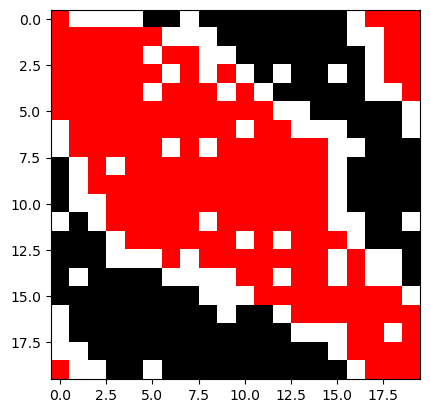

<Figure size 640x480 with 0 Axes>

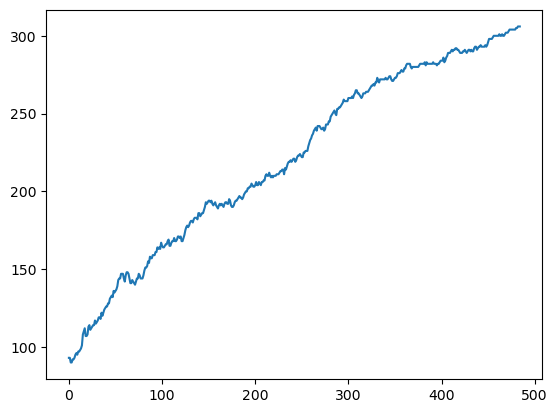

In [6]:
unhappy = True
happy = []
while unhappy:
    unhappy, empty = schellinger(60)
    if len(unhappy)==0:
        break
    
    happy.append(index*index - len(empty) - len(unhappy))
    randomIndexUnhappy = random.randint(0,len(unhappy)-1)
    randomIndexEmpty = random.randint(0,len(empty)-1)
    #print(randomIndexUnhappy,randomIndexEmpty)
    #print("Empty", empty)
    field[empty[randomIndexEmpty][0]][empty[randomIndexEmpty][1]] = field[unhappy[randomIndexUnhappy][0]][unhappy[randomIndexUnhappy][1]]
    field[unhappy[randomIndexUnhappy][0]][unhappy[randomIndexUnhappy][1]] = 0
    #prepsat agenta na nahodne prazdne pole
    #prepsat dane nahodne prazdne pole na 0
    print_progress(field, len(unhappy)-1)
fig = plt.figure()
fig, ax = plt.subplots()
ax.plot(happy)